In [1]:
import joblib
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display
from unidecode import unidecode

from datetime import date
from currency_converter import CurrencyConverter

# bokeh
from bokeh.resources import INLINE
from bokeh.plotting import figure, gridplot, GridSpec, output_file, show
from bokeh.io import output_notebook
output_notebook(resources=INLINE)

# dask
# import dask
# import dask.dataframe as dd
# from dask.delayed import delayed

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline

Loading BokehJS ...

In [2]:
def convert_to_mxn(montos, monedas, fechas):
    monto_pesos = []
    for monto, moneda, fecha in zip(montos, monedas, fechas):
        if moneda in {'MXN', 'TEST', 'OTH'}:
            monto_pesos.append(monto)
        else:
            val = converter.convert(monto, moneda, 'MXN', date=fecha)
            monto_pesos.append(val)
    return monto_pesos

# lectura y tirar repetidos
df_procedimientos = feather.read_dataframe('input_data/procedimientos_2017_06_14.feather')


print(df_procedimientos.shape)
df_procedimientos = df_procedimientos.loc[df_procedimientos.GOBIERNO == 'APF', :]
df_procedimientos = df_procedimientos.drop('GOBIERNO', axis=1)
print(df_procedimientos.shape)

cols_id = ['NUMERO_PROCEDIMIENTO', 'CODIGO_CONTRATO', 'CODIGO_EXPEDIENTE']
df_validos = df_procedimientos.drop_duplicates(subset=cols_id, keep='first')
print(df_validos.shape)


# convertir a Pesos
converter = CurrencyConverter(fallback_on_missing_rate=True)
monto_en_pesos = convert_to_mxn(
    df_validos.IMPORTE_CONTRATO.values, df_validos.MONEDA.values, df_validos.FECHA_INICIO)


df_validos = df_validos.assign(IMPORTE_PESOS=monto_en_pesos)
del monto_en_pesos

df_validos.head()

(861169, 44)
(742022, 43)
(741630, 43)


,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS
70,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,"MULTISERVICIOS Y ASESORIAS DEL CARIBE, S.A. DE...",HABILITADO,None,319200.0,NaN,MXN,IA-009JZL032-N1-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,165782,"SERVICIO DE LIMPIEZA, CZM 2012",None,ADQUISICIONES,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,NaT,2011-12-16 00:00:00,2011-12-19,NaT,2012-01-01,2013-02-28,115807,"SERVICIO DE LIMPIEZA, CZM 2012",Z15122015 04. Invitación a cuando menos tres N...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,319200.0
71,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,ALEJANDRO ALARCON JIMON,HABILITADO,None,26097.0,NaN,MXN,AA-009JZL032-N4-2012,Presencial,ADJUDICACION DIRECTA FEDERAL,165738,MANTENIMIENTO A EXTINTORES CZM,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2012-08-10 15:59:00,2012-08-10 16:05:00,NaT,2012-08-20,2012-08-26,2012-12-31,242370,"SERVICIO DE MANTENIMIENTO A EXTINTORES, AD CZM...",Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,26097.0
72,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,5578,TRANSPORTE ESPECIALIZADO DE PERSONAL NACIONAL ...,HABILITADO,MEDIANA,361200.0,NaN,MXN,IA-009JZL032-N2-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,148131,SERVICIO DE TRANSPORTE DE PERSONAL DE LA ESTAC...,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2011-12-09 14:51:00,2011-12-16 14:00:00,2011-12-19,NaT,2012-01-01,2013-02-28,116667,"SERVICIO DE TRANSPORTE DE PERSONAL, CZM 2012",Z15122015 04. Invitación a cuando menos tres N...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,361200.0
73,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,"COMERCIALIZADORA EL MAHARAJA, S.A. DE C.V.",HABILITADO,None,334264.0,NaN,MXN,AA-009JZL032-N5-2011,Mixta,ADJUDICACION DIRECTA FEDERAL,276283,SERVICIO DE COMEDOR DEL PERSONAL DE LA ESTACIO...,None,ADQUISICIONES,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2011-12-28 12:45:00,2011-12-28 17:00:00,NaT,NaT,2012-01-01,2013-02-28,123933,SERVICIO DE COMEDOR AD CZM 2012,Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,334264.0
74,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MEDIANA,nan,"COMERCIALIZADORA EL MAHARAJA, S.A. DE C.V.",HABILITADO,None,285948.0,NaN,MXN,AA-009JZL032-N5-2011,Mixta,ADJUDICACION DIRECTA FEDERAL,148083,SERVICIO DE COMEDOR PARA EL PERSONAL DE LA EST...,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,NaN,0.0,2011-12-28 12:45:00,2011-12-28 17:00:00,NaT,2011-12-30,2012-01-01,2012-12-31,123933,SERVICIO DE COMEDOR AD CZM 2012,Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,285948.0


In [3]:
df_validos.ESTRATIFICACION_MPC.value_counts(dropna=False)

NaN          196640
PEQUENA      174688
MICRO        165772
MEDIANA      119713
NO MIPYME     84817
Name: ESTRATIFICACION_MPC, dtype: int64

# Contratos y montos

## Proveedor contratista

In [4]:
conteo = df_validos.groupby('PROVEEDOR_CONTRATISTA', as_index=False).NUMERO_PROCEDIMIENTO.count()
monto = df_validos.groupby('PROVEEDOR_CONTRATISTA', as_index=False).IMPORTE_PESOS.sum()

df_empresas = pd.merge(conteo, monto, how='inner', on='PROVEEDOR_CONTRATISTA')
df_empresas = df_empresas.sort_values('IMPORTE_PESOS', ascending=False)
df_empresas = df_empresas.rename(
    columns={'NUMERO_PROCEDIMIENTO': 'PROCEDIMIENTOS', 'IMPORTE_PESOS': 'MONTO_PESOS'})
df_empresas = df_empresas.assign(MONTO_por_PROC=df_empresas.MONTO_PESOS.divide(df_empresas.PROCEDIMIENTOS))
del conteo, monto
print(df_empresas.shape)
df_empresas.head()

(140983, 4)


,PROVEEDOR_CONTRATISTA,PROCEDIMIENTOS,MONTO_PESOS,MONTO_por_PROC
58620,GRUPO FARMACOS ESPECIALIZADOS SA DE CV,1953,6.552528e+10,3.355109e+07
48331,"FARMACEUTICOS MAYPO, S.A. DE C.V.",2038,2.730809e+10,1.339945e+07
38176,DISTRIBUIDORA INTERNACIONAL DE MEDICAMENTOS Y ...,1389,2.086963e+10,1.502493e+07
128929,SIXSIGMA NETWORKS MEXICO,64,1.988804e+10,3.107506e+08
124269,SEGUROS INBURSA SA GRUPO FINANCIERO INBUR SA,244,1.788541e+10,7.330087e+07


Las primeras 30 representan el 20% del total de Monto Total


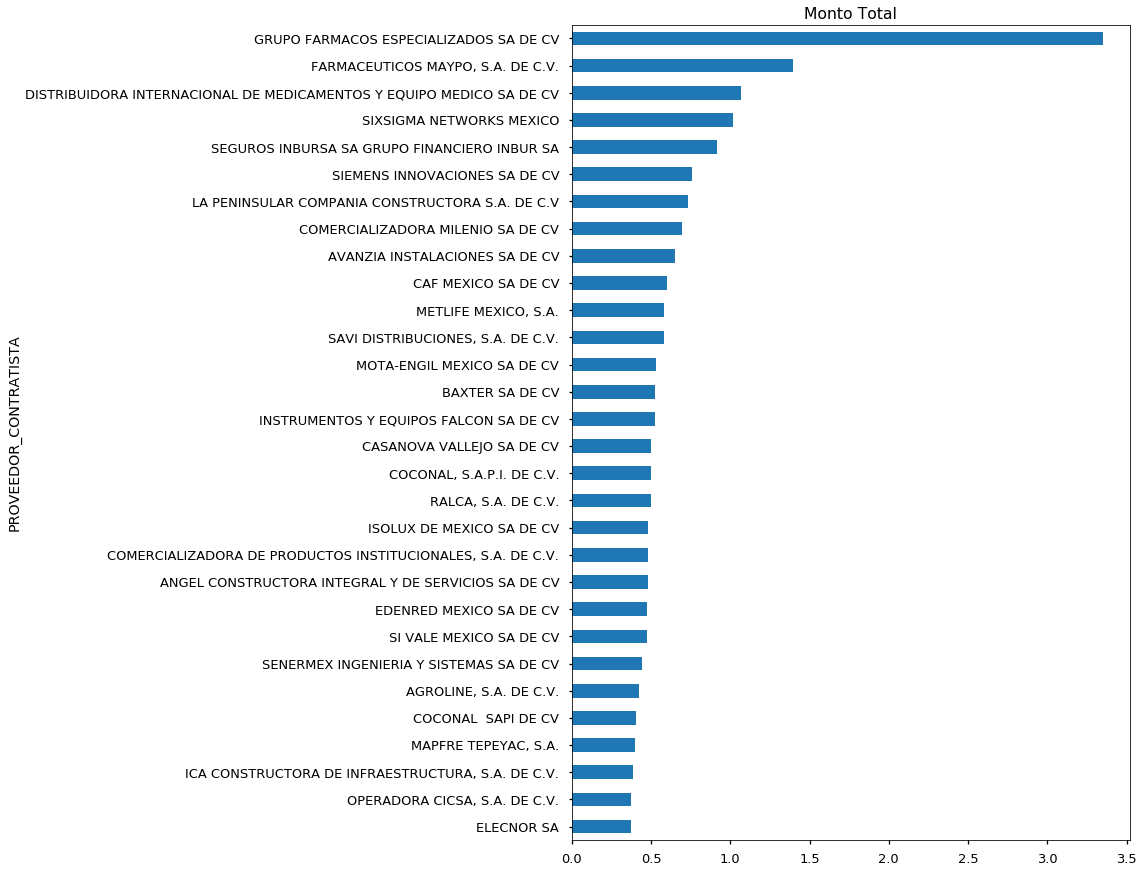

In [5]:
# numero empresas
num = 30
# col = 'PROCEDIMIENTOS'
# titulo = 'Número de Procedimientos'

col = 'MONTO_PESOS'
titulo = 'Monto Total'

# col = 'MONTO_por_PROC'
# titulo = 'Monto por Procedimiento'

with plt.style.context('seaborn-talk'):
    df_aux = df_empresas.set_index('PROVEEDOR_CONTRATISTA')[col].nlargest(num)
    df_aux = df_aux/df_empresas[col].sum()*100
    df_aux.sort_values().plot.barh(figsize=(10, 15), title=titulo)
    print('Las primeras %i representan el %i%% del total de %s' %(num, df_aux.sum(), titulo))
    # plt.tight_layout()

In [6]:
column = ['MONTO_PESOS']

csum_empresas = df_empresas.sort_values(column, ascending=False).reset_index(drop='Index')
csum_empresas['csum'] = csum_empresas[column]/csum_empresas[column].sum()
csum_empresas['csum'] = csum_empresas.csum.cumsum()*100
csum_empresas['pc_prov'] = csum_empresas.index/len(csum_empresas)*100
csum_empresas['cantidad'] = csum_empresas.index

csum_empresas.head()

,PROVEEDOR_CONTRATISTA,PROCEDIMIENTOS,MONTO_PESOS,MONTO_por_PROC,csum,pc_prov,cantidad
0,GRUPO FARMACOS ESPECIALIZADOS SA DE CV,1953,6.552528e+10,3.355109e+07,3.353039,0.000000,0
1,"FARMACEUTICOS MAYPO, S.A. DE C.V.",2038,2.730809e+10,1.339945e+07,4.750440,0.000709,1
2,DISTRIBUIDORA INTERNACIONAL DE MEDICAMENTOS Y ...,1389,2.086963e+10,1.502493e+07,5.818375,0.001419,2
3,SIXSIGMA NETWORKS MEXICO,64,1.988804e+10,3.107506e+08,6.836079,0.002128,3
4,SEGUROS INBURSA SA GRUPO FINANCIERO INBUR SA,244,1.788541e+10,7.330087e+07,7.751306,0.002837,4


In [7]:
csum_empresas[['csum', 'pc_prov']].describe()

,csum,pc_prov
count,140983.000000,140983.000000
mean,97.737240,49.999645
std,5.572526,28.867616
min,3.353039,0.000000
25%,98.299201,24.999823
50%,99.575575,49.999645
75%,99.911316,74.999468
max,100.000000,99.999291


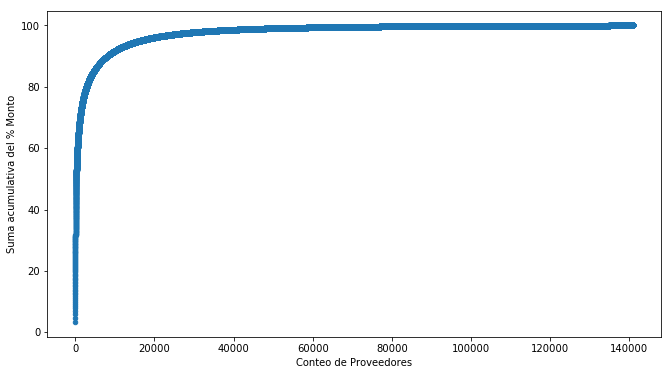

In [17]:
ax = csum_empresas.plot.scatter(x='cantidad', y='csum', figsize=(11, 6))
ax.set(xlabel='Conteo de Proveedores', ylabel='Suma acumulativa del % Monto')

In [12]:
csum_empresas[csum_empresas.csum<=80].PROVEEDOR_CONTRATISTA.nunique()

2849

In [15]:
csum_empresas[csum_empresas.cantidad==29]

,PROVEEDOR_CONTRATISTA,PROCEDIMIENTOS,MONTO_PESOS,MONTO_por_PROC,csum,pc_prov,cantidad
29,ELECNOR SA,4,7.305936e+09,1.826484e+09,20.627204,0.02057,29


In [16]:
csum_empresas.PROVEEDOR_CONTRATISTA.nunique()

140983

## Dependencia

In [21]:
conteo = df_validos.groupby('DEPENDENCIA', as_index=False).NUMERO_PROCEDIMIENTO.count()
monto = df_validos.groupby('DEPENDENCIA', as_index=False).IMPORTE_PESOS.sum()

df_empresas = pd.merge(conteo, monto, how='inner', on='DEPENDENCIA')
df_empresas = df_empresas.sort_values('IMPORTE_PESOS', ascending=False)
df_empresas = df_empresas.rename(
    columns={'NUMERO_PROCEDIMIENTO': 'PROCEDIMIENTOS', 'IMPORTE_PESOS': 'MONTO_PESOS'})
df_empresas = df_empresas.assign(MONTO_por_PROC=df_empresas.MONTO_PESOS.divide(df_empresas.PROCEDIMIENTOS))
del conteo, monto
print(df_empresas.shape)
df_empresas.head()

(269, 4)


,DEPENDENCIA,PROCEDIMIENTOS,MONTO_PESOS,MONTO_por_PROC
69,COMISION FEDERAL DE ELECTRICIDAD,141872,3.920760e+11,2.763589e+06
162,INSTITUTO MEXICANO DEL SEGURO SOCIAL,104022,3.265710e+11,3.139442e+06
227,SECRETARIA DE COMUNICACIONES Y TRANSPORTES,26364,3.010606e+11,1.141938e+07
152,INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE...,37894,1.274725e+11,3.363924e+06
212,PETROLEOS MEXICANOS (CORPORATIVO),17013,7.064321e+10,4.152308e+06


Las primeras 30 representan el 85% del total de Monto Total


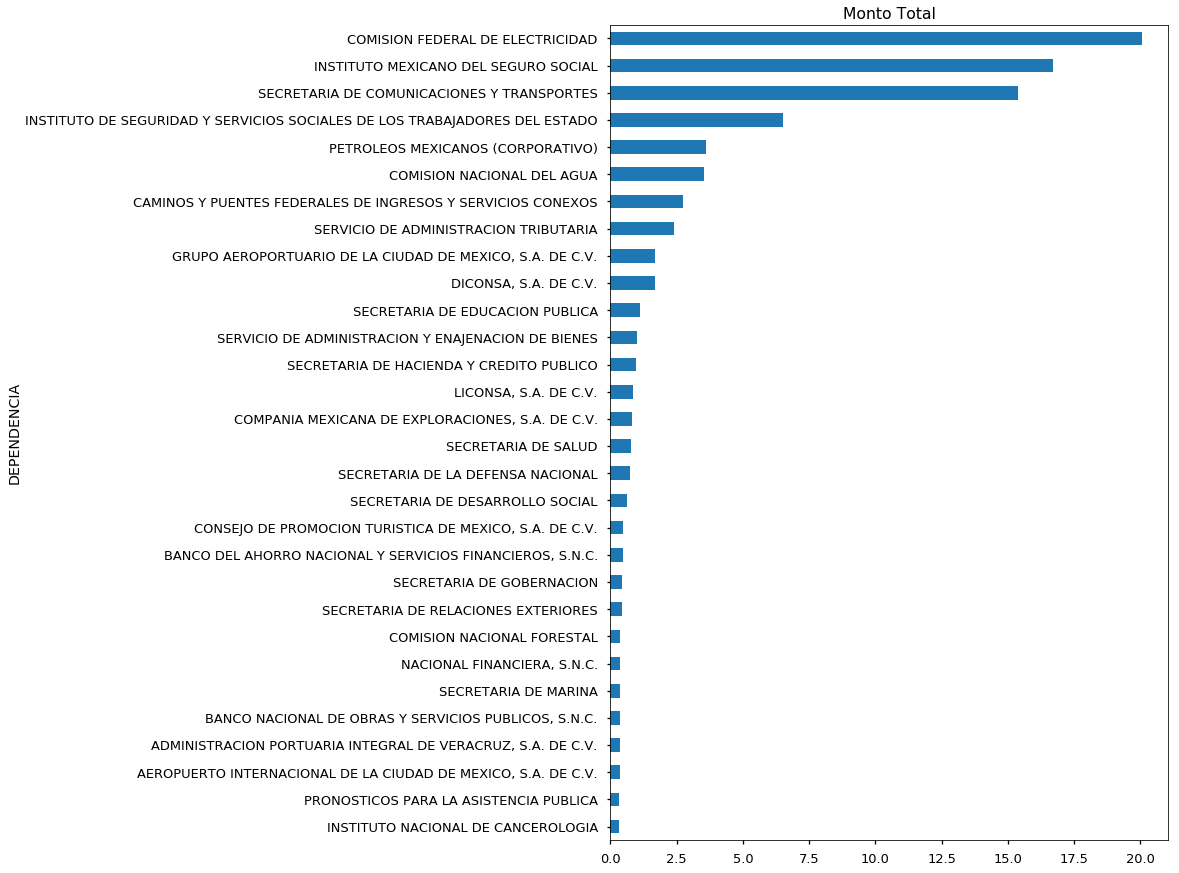

In [22]:
# numero empresas
num = 30
# col = 'PROCEDIMIENTOS'
# titulo = 'Número de Procedimientos'

col = 'MONTO_PESOS'
titulo = 'Monto Total'

# col = 'MONTO_por_PROC'
# titulo = 'Monto por Procedimiento'

with plt.style.context('seaborn-talk'):
    df_aux = df_empresas.set_index('DEPENDENCIA')[col].nlargest(num)
    df_aux = df_aux/df_empresas[col].sum()*100
    df_aux.sort_values().plot.barh(figsize=(10, 15), title=titulo)
    print('Las primeras %i representan el %i%% del total de %s' %(num, df_aux.sum(), titulo))
    # plt.tight_layout()

In [23]:
column = ['MONTO_PESOS']

csum_empresas = df_empresas.sort_values(column, ascending=False).reset_index(drop='Index')
csum_empresas['csum'] = csum_empresas[column]/csum_empresas[column].sum()
csum_empresas['csum'] = csum_empresas.csum.cumsum()*100
csum_empresas['pc_prov'] = csum_empresas.index/len(csum_empresas)*100
csum_empresas['cantidad'] = csum_empresas.index

csum_empresas.head()

,DEPENDENCIA,PROCEDIMIENTOS,MONTO_PESOS,MONTO_por_PROC,csum,pc_prov,cantidad
0,COMISION FEDERAL DE ELECTRICIDAD,141872,3.920760e+11,2.763589e+06,20.062577,0.000000,0
1,INSTITUTO MEXICANO DEL SEGURO SOCIAL,104022,3.265710e+11,3.139442e+06,36.773258,0.371747,1
2,SECRETARIA DE COMUNICACIONES Y TRANSPORTES,26364,3.010606e+11,1.141938e+07,52.178567,0.743494,2
3,INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE...,37894,1.274725e+11,3.363924e+06,58.701353,1.115242,3
4,PETROLEOS MEXICANOS (CORPORATIVO),17013,7.064321e+10,4.152308e+06,62.316176,1.486989,4


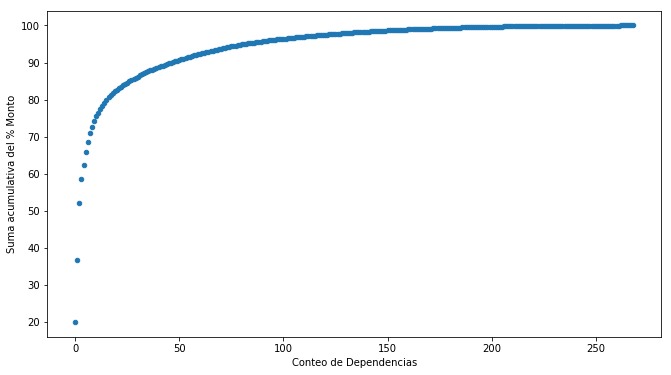

In [28]:
ax = csum_empresas.plot.scatter(x='cantidad', y='csum', figsize=(11, 6))
ax.set(xlabel='Conteo de Dependencias', ylabel='Suma acumulativa del % Monto')

In [26]:
csum_empresas[csum_empresas.csum<=80].DEPENDENCIA.nunique()

16

In [33]:
csum_empresas[csum_empresas.cantidad==29]

,DEPENDENCIA,PROCEDIMIENTOS,MONTO_PESOS,MONTO_por_PROC,csum,pc_prov,cantidad
29,INSTITUTO NACIONAL DE CANCEROLOGIA,4337,6.270795e+09,1.445883e+06,85.940467,10.780669,29


In [31]:
csum_empresas.DEPENDENCIA.nunique()

269

# Empresas con más de una forma de reportarse

## Manifestada por el proveedor

In [41]:
df_validos['homologa_provs'] = df_validos.PROVEEDOR_CONTRATISTA.map(
    lambda x: unidecode(str(x)).lower().replace('"', '').replace('.', '').replace(',','').strip())

In [85]:
estrat = df_validos.groupby('homologa_provs').ESTRATIFICACION_MPC.nunique()
print(estrat.shape)
estrat.head()

(129418,)


homologa_provs
'grupo industrial scano sa de cv                       0
'sensores e instrumentacionde mexico sa de cv          0
(np) energy nevada inc                                 0
(sigsa) sistemas de informacion geografica sa de cv    0
+hq systems sa de cv                                   1
Name: ESTRATIFICACION_MPC, dtype: int64

In [92]:
df_validos[df_validos.homologa_provs=='\'grupo industrial scano sa de cv']

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,homologa_provs
426439,SECRETARIA DE COMUNICACIONES Y TRANSPORTES,SCT,SCT-CENTRO SCT VERACRUZ #009000938,009000938,WILLIAM DAVID KNIGHT BONIFACIO,MEDIANA,nan,"'GRUPO INDUSTRIAL SCANO, S.A. DE C.V.",HABILITADO,None,400380.40,NaN,MXN,SO-009000938-N301-2014,Presencial,ADJUDICACION DIRECTA FEDERAL,675010,2014-30-CF-D-367-W-00-2014,None,OBRA PUBLICA,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,NaT,NaT,NaT,2014-11-07,2014-11-15,2015-02-12,747847,2014-30-CF-D-367-W-00-2014,Z15122015 24. Adjudicación Directa Nacional Si...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,400380.40,'grupo industrial scano sa de cv
426463,SECRETARIA DE COMUNICACIONES Y TRANSPORTES,SCT,SCT-CENTRO SCT VERACRUZ #009000938,009000938,WILLIAM DAVID KNIGHT BONIFACIO,MEDIANA,nan,"'GRUPO INDUSTRIAL SCANO, S.A. DE C.V.",HABILITADO,None,1842380.46,NaN,MXN,SO-009000938-N300-2014,Presencial,ADJUDICACION DIRECTA FEDERAL,675019,2014-30-CF-D-360-W-00-2014,None,OBRA PUBLICA,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,NaT,NaT,NaT,2014-11-03,2014-11-10,2015-02-07,747850,2014-30-CF-D-360-W-00-2014,Z15122015 24. Adjudicación Directa Nacional Si...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,1842380.46,'grupo industrial scano sa de cv
426555,SECRETARIA DE COMUNICACIONES Y TRANSPORTES,SCT,SCT-CENTRO SCT VERACRUZ #009000938,009000938,WILLIAM DAVID KNIGHT BONIFACIO,MEDIANA,nan,"'GRUPO INDUSTRIAL SCANO, S.A. DE C.V.",HABILITADO,None,1500822.40,NaN,MXN,SO-009000938-N302-2014,Electrónica,ADJUDICACION DIRECTA FEDERAL,675473,2014-30-CF-D-368-W-00-2014,None,OBRA PUBLICA,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,NaT,NaT,NaT,2014-11-07,2014-11-15,2015-02-12,748192,'2014-30-CF-D-368-W-00-2014,Z15122015 24. Adjudicación Directa Nacional Si...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,1500822.40,'grupo industrial scano sa de cv


In [60]:
df_validos.shape

(741630, 45)

In [95]:
df_validos[df_validos.ESTRATIFICACION_MPC.isnull()].homologa_provs.nunique()

70682

In [88]:
# Empresas proveedoras con más de un tipo de estratificación
raras = df_validos[(df_validos.homologa_provs.isin(estrat[estrat!=1].index)) | (df_validos.ESTRATIFICACION_MPC.isnull())]
print(raras.shape)
raras[['homologa_provs', 'ESTRATIFICACION_MPC']].drop_duplicates().head()

(200750, 45)


,homologa_provs,ESTRATIFICACION_MPC
70,multiservicios y asesorias del caribe sa de cv,None
71,alejandro alarcon jimon,None
73,comercializadora el maharaja sa de cv,None
75,miguel rojas puente,None
77,jesus hernandez alpide,None


In [96]:
raras.IMPORTE_PESOS.sum(), raras.IMPORTE_PESOS.sum()/df_validos.IMPORTE_PESOS.sum()

(308570076351.4454, 0.15789570791081525)

In [46]:
raras.IMPORTE_PESOS.describe()

count    4.428000e+03
mean     2.412316e+06
std      1.708130e+07
min      0.000000e+00
25%      6.084000e+04
50%      1.925000e+05
75%      8.976215e+05
max      7.164528e+08
Name: IMPORTE_PESOS, dtype: float64

In [47]:
raras.IMPORTE_CONTRATO.describe()

count    4.428000e+03
mean     2.369906e+06
std      1.706884e+07
min      0.000000e+00
25%      5.683500e+04
50%      1.800000e+05
75%      8.392610e+05
max      7.164528e+08
Name: IMPORTE_CONTRATO, dtype: float64

In [48]:
raras[raras.IMPORTE_PESOS==raras.IMPORTE_PESOS.max()]

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,homologa_provs
505702,COMISION FEDERAL DE ELECTRICIDAD,CFE,CFE-GERENCIA DE ABASTECIMIENTOS #018TOQ003,018TOQ003,LUIS FERNANDO CASTRO VIEYRA,NO MIPYME,nan,CONTROLES Y MEDIDORES ESPECIALIZADOS SA DE CV,HABILITADO,NO MIPYME,7.164528e+08,NaN,MXN,LA-018TOQ003-T173-2015,Electrónica,LICITACION PUBLICA,836602,LA-018TOQ003-T173-2015,None,ADQUISICIONES,EXPIRADO,1.0,0.0,Internacional,0.0,0.0,2015-06-17 11:22:00,2015-06-30 11:00:00,2015-07-06,NaT,2015-07-14,2015-11-11,835949,"ADQUISICION DE WATHORIMETROS MONOFASICOS, BIFA...",Z15122015 02. Licitación Pública Internacional...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,7.164528e+08,controles y medidores especializados sa de cv


In [49]:
raras[raras.PROVEEDOR_CONTRATISTA=='CONTROLES Y MEDIDORES ESPECIALIZADOS SA DE CV']

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,homologa_provs
244431,COMISION FEDERAL DE ELECTRICIDAD,CFE,CFE-DIVISION DE DISTRIBUCION ORIENTE,018TOQ015,ENRIQUE RAFAEL OSORNO ESTRADA,MICRO,nan,CONTROLES Y MEDIDORES ESPECIALIZADOS SA DE CV,HABILITADO,MICRO,2.256519e+06,NaN,MXN,XX-018TOQ015-X162-2013,None,LICITACION PUBLICA,452269,None,None,ADQUISICIONES,EXPIRADO,1.0,0.0,None,0.0,NaN,NaT,NaT,NaT,2013-11-29,2013-11-29,2013-12-29,515136,LA-018TOQ003-T257-2013 WATTHORIMETROS MONOFASI...,32. Reporte de otras contrataciones y contrata...,None,PoC,None,Si,None,NaN,None,NaN,2.256519e+06,controles y medidores especializados sa de cv
244432,COMISION FEDERAL DE ELECTRICIDAD,CFE,CFE-DIVISION DE DISTRIBUCION ORIENTE,018TOQ015,ENRIQUE RAFAEL OSORNO ESTRADA,MICRO,nan,CONTROLES Y MEDIDORES ESPECIALIZADOS SA DE CV,HABILITADO,MICRO,1.455818e+07,NaN,MXN,XX-018TOQ015-X162-2013,None,LICITACION PUBLICA,428630,None,None,ADQUISICIONES,EXPIRADO,1.0,0.0,None,0.0,NaN,NaT,NaT,NaT,2013-11-26,2013-11-26,2013-12-26,515136,LA-018TOQ003-T257-2013 WATTHORIMETROS MONOFASI...,32. Reporte de otras contrataciones y contrata...,None,PoC,None,Si,None,NaN,None,NaN,1.455818e+07,controles y medidores especializados sa de cv
361058,COMISION FEDERAL DE ELECTRICIDAD,CFE,CFE-GERENCIA DE ABASTECIMIENTOS #018TOQ003,018TOQ003,LUIS FERNANDO CASTRO VIEYRA,NO MIPYME,nan,CONTROLES Y MEDIDORES ESPECIALIZADOS SA DE CV,HABILITADO,NO MIPYME,4.158640e+08,NaN,MXN,LA-018TOQ003-T157-2014,Electrónica,LICITACION PUBLICA,686266,LA-018TOQ003-T157-2014,None,ADQUISICIONES,EXPIRADO,1.0,0.0,Internacional,0.0,0.0,2014-06-25 14:15:00,2014-07-15 09:00:00,2014-07-30,2014-08-14,2014-07-30,2014-11-27,617269,"ADQUISICION DE WATTHORIMETROS MONOFASICOS, BIF...",Z15122015 02. Licitación Pública Internacional...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,4.158640e+08,controles y medidores especializados sa de cv
387081,COMISION FEDERAL DE ELECTRICIDAD,CFE,CFE-GERENCIA DIVISIONAL CENTRO OCCIDENTE #018T...,018TOQ008,RICARDO CALDERON MEDELLIN,MEDIANA,nan,CONTROLES Y MEDIDORES ESPECIALIZADOS SA DE CV,HABILITADO,NO MIPYME,1.806293e+07,NaN,MXN,LA-018TOQ008-T52-2014,Electrónica,LICITACION PUBLICA,564956,WATTHORIMETROS BIFASICOS,None,ADQUISICIONES,EXPIRADO,0.0,0.0,Internacional,0.0,0.0,2014-04-03 02:00:00,2014-05-16 09:00:00,2014-05-26,NaT,2014-05-26,2014-06-26,573845,WATTHORIMETROS BIFASICOS Y TRIFASICOS,Z15122015 02. Licitación Pública Internacional...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,1.806293e+07,controles y medidores especializados sa de cv
458596,COMISION FEDERAL DE ELECTRICIDAD,CFE,CFE-DIVISION DE DISTRIBUCION ORIENTE #018TOQ015,018TOQ015,ENRIQUE RAFAEL OSORNO ESTRADA,MICRO,nan,CONTROLES Y MEDIDORES ESPECIALIZADOS SA DE CV,HABILITADO,NO MIPYME,4.901794e+07,NaN,MXN,XX-018TOQ015-X167-2014,Electrónica,LICITACION PUBLICA,592073,700441863,None,ADQUISICIONES,EXPIRADO,1.0,0.0,Internacional,0.0,0.0,NaT,NaT,NaT,NaT,2014-09-19,2014-11-28,663407,LPI LA-0188TOQ003-T157-2014 WATTHORIMETROS,08. Reporte de otras contrataciones y contrata...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,0.0,4.901794e+07,controles y medidores especializados sa de cv
505702,COMISION FEDERAL DE ELECTRICIDAD,CFE,CFE-GERENCIA DE ABASTECIMIENTOS #018TOQ003,018TOQ003,LUIS FERNANDO CASTRO VIEYRA,NO MIPYME,nan,CONTROLES Y MEDIDO

In [80]:
df_validos[df_validos.ESTRATIFICACION_MPC==df_validos.ESTRATIFICACION_MUC]

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,homologa_provs
83,INSTITUTO MEXICANO DEL SEGURO SOCIAL,IMSS,IMSS-OFICINA DE ADQUISICIONES DE LA DELEGACION...,019GYR027,JOSE FRANCISCO MENDOZA MARTINEZ,NO MIPYME,nan,SOLUCIONES INTRAHOSPITALARIAS DE LEON,HABILITADO,NO MIPYME,397413.80,NaN,MXN,LA-019GYR027-N15-2012,Electrónica,LICITACION PUBLICA,555035,PRESTACIONES DE SERVICIOS SUBROGADOS,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2012-04-10 02:00:00,2012-04-24 09:00:00,2012-04-27,2012-05-11,2012-04-27,2012-12-31,162245,CONTRATACION DE SERVICIOS MEDICOS SUBROGADOS 2012,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,397413.80,soluciones intrahospitalarias de leon
86,INSTITUTO MEXICANO DEL SEGURO SOCIAL,IMSS,IMSS-OFICINA DE ADQUISICIONES DE LA DELEGACION...,019GYR027,JOSE FRANCISCO MENDOZA MARTINEZ,NO MIPYME,nan,HOMERO HERNANDEZ RIVERA,HABILITADO,NO MIPYME,123275.86,NaN,MXN,LA-019GYR027-N15-2012,Electrónica,LICITACION PUBLICA,555032,FISIOTERAPIAS,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2012-04-10 02:00:00,2012-04-24 09:00:00,2012-04-27,2012-05-11,2012-04-27,2012-12-31,162245,CONTRATACION DE SERVICIOS MEDICOS SUBROGADOS 2012,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,123275.86,homero hernandez rivera
93,INSTITUTO MEXICANO DEL SEGURO SOCIAL,IMSS,IMSS-OFICINA DE ADQUISICIONES DE LA DELEGACION...,019GYR027,JOSE FRANCISCO MENDOZA MARTINEZ,MEDIANA,nan,LACTEOS PROCESADOS DEL CENTRO SA DE CV,HABILITADO,MEDIANA,1469917.00,NaN,MXN,LA-019GYR027-N68-2011,Electrónica,LICITACION PUBLICA,505859,ADQUISICION DE VIVERES CON ENTREGA A UNIDADES ...,None,ADQUISICIONES,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2011-11-29 13:30:00,2011-12-13 15:30:00,2011-12-16,2012-01-06,2012-01-01,2012-12-31,102343,SUMINISTRO DE VIVERES,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,1469917.00,lacteos procesados del centro sa de cv
95,INSTITUTO MEXICANO DEL SEGURO SOCIAL,IMSS,IMSS-OFICINA DE ADQUISICIONES DE LA DELEGACION...,019GYR027,JOSE FRANCISCO MENDOZA MARTINEZ,NO MIPYME,9848,FOOD SERVICE DE MEXICO SA DE CV,HABILITADO,NO MIPYME,550911.74,NaN,MXN,LA-019GYR027-N68-2011,Electrónica,LICITACION PUBLICA,505857,ADQUISICION DE VIVERES CON ENTREGA A UNIDADES ...,None,ADQUISICIONES,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2011-11-29 13:30:00,2011-12-13 15:30:00,2011-12-16,2012-01-06,2012-01-01,2012-12-31,102343,SUMINISTRO DE VIVERES,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,550911.74,food service de mexico sa de cv
101,INSTITUTO MEXICANO DEL SEGURO SOCIAL,IMSS,IMSS-OFICINA DE ADQUISICIONES DE LA DELEGACION...,019GYR027,JOSE FRANCISCO MENDOZA MARTINEZ,NO MIPYME,nan,GRUPO ATMA SA DE CV,HABILITADO,NO MIPYME,381287.00,NaN,MXN,LA-019GYR027-N39-2011,Mixta,LICITACION PUBLICA,539497,SERVICIO DE RECARGA DE EXINTORES,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2011-10-13 02:00:00,2011-11-01 15:30:00,2011-11-08,2011-11-23,2012-01-02,2012-12-31,82401,RECARGA DE EXTINTORES,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,381287.00,grupo atma sa de cv
103,INSTITUTO MEXI

In [81]:
df_validos[df_validos.ESTRATIFICACION_MPC!=df_validos.ESTRATIFICACION_MUC]

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,homologa_provs
70,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,"MULTISERVICIOS Y ASESORIAS DEL CARIBE, S.A. DE...",HABILITADO,None,319200.00,NaN,MXN,IA-009JZL032-N1-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,165782,"SERVICIO DE LIMPIEZA, CZM 2012",None,ADQUISICIONES,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,NaT,2011-12-16 00:00:00,2011-12-19,NaT,2012-01-01,2013-02-28,115807,"SERVICIO DE LIMPIEZA, CZM 2012",Z15122015 04. Invitación a cuando menos tres N...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,319200.00,multiservicios y asesorias del caribe sa de cv
71,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,ALEJANDRO ALARCON JIMON,HABILITADO,None,26097.00,NaN,MXN,AA-009JZL032-N4-2012,Presencial,ADJUDICACION DIRECTA FEDERAL,165738,MANTENIMIENTO A EXTINTORES CZM,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2012-08-10 15:59:00,2012-08-10 16:05:00,NaT,2012-08-20,2012-08-26,2012-12-31,242370,"SERVICIO DE MANTENIMIENTO A EXTINTORES, AD CZM...",Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,26097.00,alejandro alarcon jimon
72,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,5578,TRANSPORTE ESPECIALIZADO DE PERSONAL NACIONAL ...,HABILITADO,MEDIANA,361200.00,NaN,MXN,IA-009JZL032-N2-2012,Mixta,INVITACION A CUANDO MENOS 3 PERSONAS,148131,SERVICIO DE TRANSPORTE DE PERSONAL DE LA ESTAC...,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2011-12-09 14:51:00,2011-12-16 14:00:00,2011-12-19,NaT,2012-01-01,2013-02-28,116667,"SERVICIO DE TRANSPORTE DE PERSONAL, CZM 2012",Z15122015 04. Invitación a cuando menos tres N...,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,361200.00,transporte especializado de personal nacional ...
73,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MICRO,nan,"COMERCIALIZADORA EL MAHARAJA, S.A. DE C.V.",HABILITADO,None,334264.00,NaN,MXN,AA-009JZL032-N5-2011,Mixta,ADJUDICACION DIRECTA FEDERAL,276283,SERVICIO DE COMEDOR DEL PERSONAL DE LA ESTACIO...,None,ADQUISICIONES,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2011-12-28 12:45:00,2011-12-28 17:00:00,NaT,NaT,2012-01-01,2013-02-28,123933,SERVICIO DE COMEDOR AD CZM 2012,Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN,334264.00,comercializadora el maharaja sa de cv
74,AEROPUERTOS Y SERVICIOS AUXILIARES,ASA,ASA-ESTACION DE COMBUSTIBLES DEL AEROPUERTO DE...,009JZL032,JOSE LUIS ALMADA PENUNURI,MEDIANA,nan,"COMERCIALIZADORA EL MAHARAJA, S.A. DE C.V.",HABILITADO,None,285948.00,NaN,MXN,AA-009JZL032-N5-2011,Mixta,ADJUDICACION DIRECTA FEDERAL,148083,SERVICIO DE COMEDOR PARA EL PERSONAL DE LA EST...,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,NaN,0.0,2011-12-28 12:45:00,2011-12-28 17:00:00,NaT,2011-12-30,2012-01-01,2012-12-31,123933,SERVICIO DE COMEDOR AD CZM 2012,Z15122015 07. Adjudicación Directa Nacional Ar...,None,UC,https://compranet.funcionpublica.gob.mx/esop/g...,Si,MX,NaN,None,NaN

In [56]:
sin_prov = df_validos[(df_validos.PROVEEDOR_CONTRATISTA=='---') | (df_validos.PROVEEDOR_CONTRATISTA.isnull())]
sin_prov.shape

(78, 45)

In [58]:
sin_prov.IMPORTE_PESOS.sum()/df_validos.IMPORTE_PESOS.sum()

4.605627773254034e-05

In [61]:
df_validos[(df_validos.MONEDA=='MXN') & (df_validos.IMPORTE_CONTRATO!=df_validos.IMPORTE_PESOS)]

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,homologa_provs


In [62]:
raras.homologa_provs.nunique(), df_procedimientos.homologa_provs.nunique()

(137, 129418)

In [63]:
estrat[estrat>2]

homologa_provs
---                                                  4
camara nacional de la industria de transformacion    3
Name: ESTRATIFICACION_MPC, dtype: int64

In [106]:
aux = df_validos.fillna('NA').groupby('ESTRATIFICACION_MPC').IMPORTE_PESOS.agg(['mean', 'std']).sort_values('mean')
aux.to_clipboard()

(0, 9731268.2399379145)

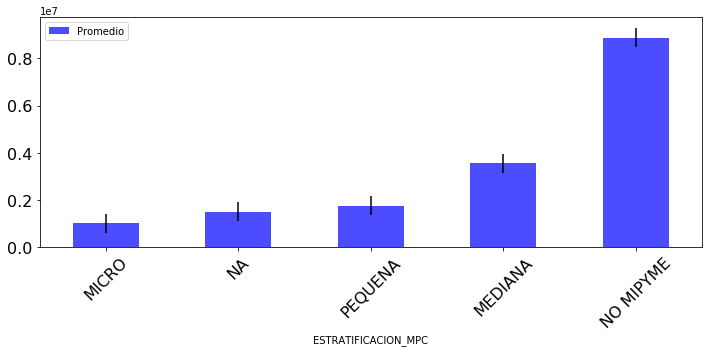

In [123]:
aux['mean'].plot(figsize=(10,5), legend=True, kind="bar", rot=45, color="blue", fontsize=16, yerr=aux['std'], alpha=0.7,
                 label='Promedio')
plt.tight_layout()
plt.ylim(0)

MEDIANA


,index,IMPORTE_PESOS
0,count,1.197130e+05
1,mean,3.555754e+06
2,std,6.225213e+07
3,min,0.000000e+00
4,25%,5.000000e+04
5,50%,1.825460e+05
6,75%,8.821120e+05
7,max,1.169836e+10


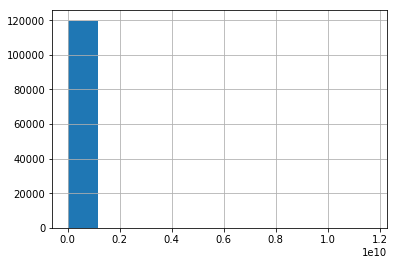

MICRO


,index,IMPORTE_PESOS
0,count,1.657720e+05
1,mean,1.027833e+06
2,std,2.946964e+07
3,min,0.000000e+00
4,25%,3.444000e+04
5,50%,9.701345e+04
6,75%,2.991245e+05
7,max,6.771450e+09


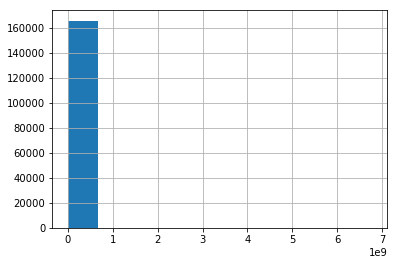

NO MIPYME


,index,IMPORTE_PESOS
0,count,8.481700e+04
1,mean,8.867875e+06
2,std,1.108743e+08
3,min,0.000000e+00
4,25%,4.748922e+04
5,50%,1.560240e+05
6,75%,8.274244e+05
7,max,8.748554e+09


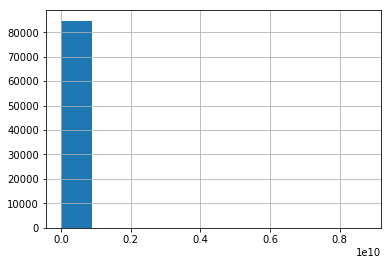

PEQUENA


,index,IMPORTE_PESOS
0,count,1.746880e+05
1,mean,1.759603e+06
2,std,2.476612e+07
3,min,0.000000e+00
4,25%,4.260995e+04
5,50%,1.440000e+05
6,75%,5.499771e+05
7,max,3.646281e+09


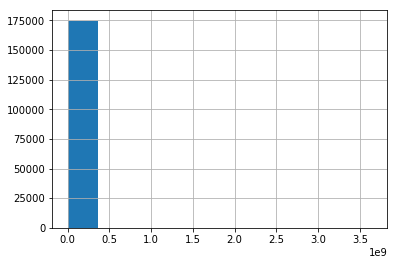

In [78]:
for i, g in df_validos.groupby('ESTRATIFICACION_MPC'):
    print(i)
    display(g.IMPORTE_PESOS.describe().reset_index())
    g.IMPORTE_PESOS.hist()
    plt.show()

In [79]:
df_validos[df_validos.IMPORTE_CONTRATO==0]

,DEPENDENCIA,SIGLAS,NOMBRE_DE_LA_UC,CLAVEUC,RESPONSABLE,ESTRATIFICACION_MUC,FOLIO_RUPC,PROVEEDOR_CONTRATISTA,ESTATUS_EMPRESA,ESTRATIFICACION_MPC,IMPORTE_CONTRATO,APORTACION_FEDERAL,MONEDA,NUMERO_PROCEDIMIENTO,FORMA_PROCEDIMIENTO,TIPO_PROCEDIMIENTO,CODIGO_CONTRATO,TITULO_CONTRATO,IDENTIFICADOR_CM,TIPO_CONTRATACION,ESTATUS_CONTRATO,COMPRA_CONSOLIDADA,PLURIANUAL,CARACTER,CONTRATO_MARCO,CONVENIO_MODIFICATORIO,PROC_F_PUBLICACION,FECHA_APERTURA_PROPOSICIONES,EXP_F_FALLO,FECHA_CELEBRACION,FECHA_INICIO,FECHA_FIN,CODIGO_EXPEDIENTE,TITULO_EXPEDIENTE,PLANTILLA_EXPEDIENTE,CLAVE_PROGRAMA,CUENTA_ADMINISTRADA_POR,ANUNCIO,ARCHIVADO,SIGLAS_PAIS,RAMO,ORGANISMO,C_EXTERNO,IMPORTE_PESOS,homologa_provs
11596,INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE...,ISSSTE,ISSSTE-COORDINACION DE MANTENIMIENTO #019GYN081,019GYN081,JULIO ALEJANDRO HUERTA HERRERA,PEQUENA,nan,SERVICIOS ELECTROMEDICOS Y OPTICOS SA DE CV,HABILITADO,MICRO,0.0,NaN,MXN,LA-019GYN081-N3-2012,Electrónica,LICITACION PUBLICA,829654,MANTENIMIENTO PREVENTIVO Y CORRECTIVO A LOS EQ...,None,SERVICIOS,EXPIRADO,0.0,0.0,Nacional,0.0,0.0,2012-03-06 02:00:00,2012-03-21 10:00:00,2012-03-23,NaT,2012-04-01,2012-12-31,151697,EQUIPO MEDICO E INSTRUMENTAL QUIRURGICO DEL HO...,Z15122015 01. Licitación Pública Nacional LAASSP,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,0.0,servicios electromedicos y opticos sa de cv
21956,CENTRO DE INVESTIGACIONES BIOLOGICAS DEL NOROE...,CIBNOR,CIBNOR-SUBDIRECCION DE SERVICIOS GENERALES #03...,03890O002,MARIA ELENA CASTRO NUNEZ,PEQUENA,nan,VILLAGOMEZ JURADO SA DE CV,HABILITADO,MEDIANA,0.0,NaN,MXN,LO-03890O002-N109-2012,Mixta,LICITACION PUBLICA,282375,CONVENIO NO. 2 AL CONTRATO OP12-017-VJU,None,OBRA PUBLICA,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2012-04-12 02:00:00,2012-04-30 09:00:00,2012-05-09,NaT,2012-12-01,2012-12-15,153058,CONSTRUCCION DEL LABORATORIO DE NUTRICION ACUI...,Z15122015 16. Licitación Pública Nacional LOPSRM,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,0.0,villagomez jurado sa de cv
21957,CENTRO DE INVESTIGACIONES BIOLOGICAS DEL NOROE...,CIBNOR,CIBNOR-SUBDIRECCION DE SERVICIOS GENERALES #03...,03890O002,MARIA ELENA CASTRO NUNEZ,PEQUENA,nan,VILLAGOMEZ JURADO SA DE CV,HABILITADO,MEDIANA,0.0,NaN,MXN,LO-03890O002-N109-2012,Mixta,LICITACION PUBLICA,248773,"CONVENIO 1 NO. OP12-017-VJU, OBRA EDIFICIO N",None,OBRA PUBLICA,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2012-04-12 02:00:00,2012-04-30 09:00:00,2012-05-09,NaT,2012-10-18,2012-11-30,153058,CONSTRUCCION DEL LABORATORIO DE NUTRICION ACUI...,Z15122015 16. Licitación Pública Nacional LOPSRM,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,0.0,villagomez jurado sa de cv
22075,CENTRO DE INVESTIGACIONES BIOLOGICAS DEL NOROE...,CIBNOR,CIBNOR-SUBDIRECCION DE SERVICIOS GENERALES #03...,03890O002,MARIA ELENA CASTRO NUNEZ,MEDIANA,41018,CONSTRUCCIONES GUSA,HABILITADO,PEQUENA,0.0,NaN,MXN,LO-03890O002-N323-2011,Mixta,LICITACION PUBLICA,280535,"CONVENIO 6 NO. OP11-036-CGU, OBRA EDIFICIO J",None,OBRA PUBLICA,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2011-11-10 02:00:00,2011-11-29 10:00:00,2011-12-08,NaT,2012-12-01,2012-12-20,90731,CONSTRUCCION DE LABORATORIOS EDIFICIO J LO-038...,Z15122015 16. Licitación Pública Nacional LOPSRM,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,0.0,construcciones gusa
22076,CENTRO DE INVESTIGACIONES BIOLOGICAS DEL NOROE...,CIBNOR,CIBNOR-SUBDIRECCION DE SERVICIOS GENERALES #03...,03890O002,MARIA ELENA CASTRO NUNEZ,PEQUENA,41018,CONSTRUCCIONES GUSA,HABILITADO,PEQUENA,0.0,NaN,MXN,LO-03890O002-N323-2011,Mixta,LICITACION PUBLICA,249471,"CONVENIO 3 NO. OP11-036-CGU, OBRA EDIFICIO J",None,OBRA PUBLICA,EXPIRADO,0.0,0.0,Nacional,0.0,1.0,2011-11-10 02:00:00,2011-11-29 10:00:00,2011-12-08,NaT,2012-08-24,2012-10-04,90731,CONSTRUCCION DE LABORATORIOS EDIFICIO J LO-038...,Z15122015 16. Licitación Pública Nacional LOPSRM,None,PoC,https://compranet.funcionpublica.gob.mx/esop/g...,No,MX,NaN,None,NaN,0.0,con

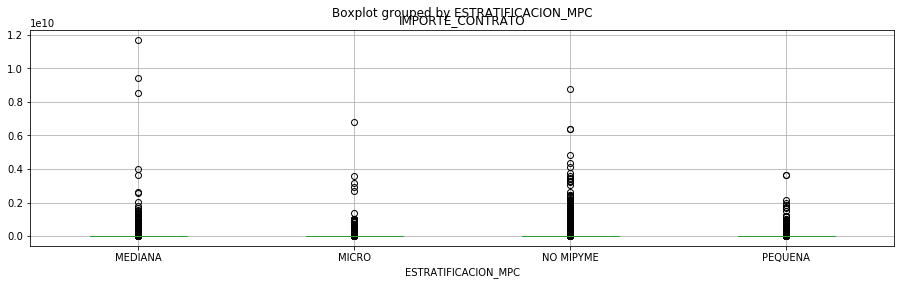

In [71]:
df_validos.boxplot(by='ESTRATIFICACION_MPC', column='IMPORTE_CONTRATO', figsize=(15, 4))
# plt.ylim((-1e3, 2e6))